In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense,Conv1D,MaxPooling1D,UpSampling1D,Flatten,add
from tensorflow.keras.callbacks import ModelCheckpoint

from AD_tools import * # specifically need training()

In [2]:
theory_1st = np.loadtxt("data/theory_1st.txt")
theory_2nd = np.loadtxt("data/theory_2nd.txt")
theorycolor="grey"

In [3]:
plt.rcParams.update({
    'figure.figsize': (6,5),
    'font.size': 16,
    })

In [4]:
name = "Referee_test"

In [5]:
data = np.loadtxt("data/dataD10s_cut03.txt")
data.shape

(400, 43)

In [6]:
xx, yy = data[:,0], data[:,1]

In [7]:
sorter = np.argsort(xx)
xx, yy = xx[sorter], yy[sorter]

In [8]:
x_data = data[:,3:][sorter]

In [9]:
x_data.shape

(400, 40)

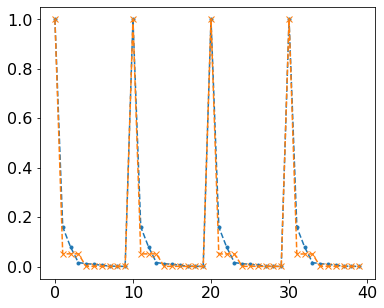

In [10]:
plt.plot(x_data[0],".--")
plt.plot(x_data[-1],"x--")

normalize data

In [11]:
x_normed = x_data.copy()

In [12]:
for i,x in enumerate(x_data):
    x_normed[i] = x/np.sqrt(np.inner(x,x))

alt. normalization

In [13]:
x_normed2 = x_data.copy()

In [14]:
for i,x in enumerate(x_data):
    x_normed2[i] = x/np.mean(x)

data from single training

In [15]:
temp = np.load("data_results/3-0_data.npz",allow_pickle=True)

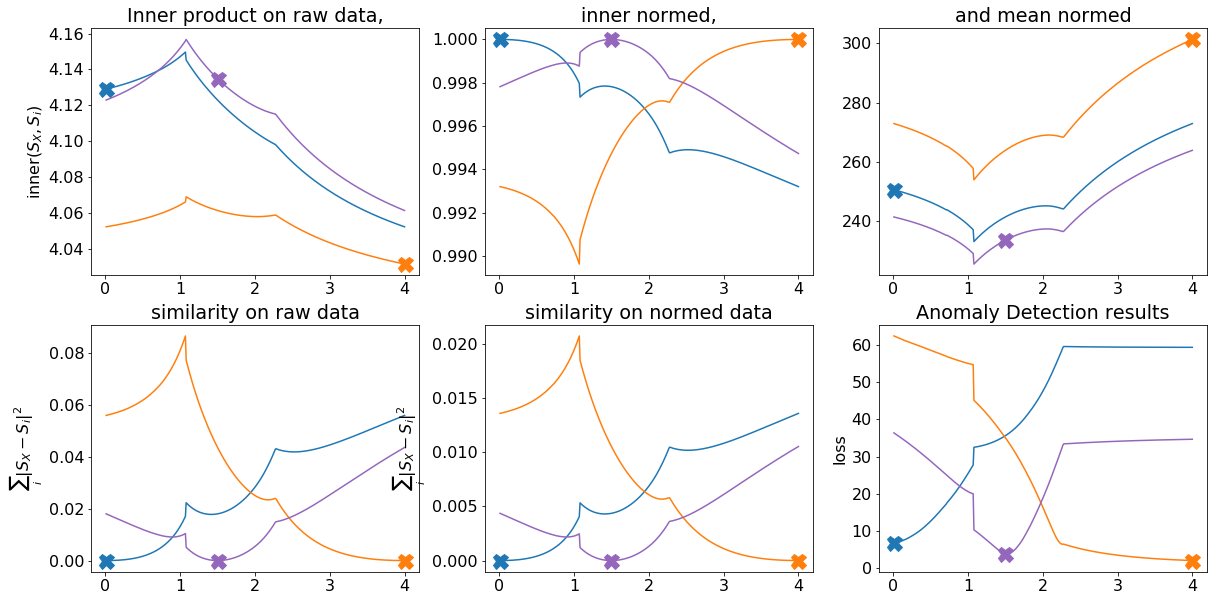

In [20]:
color = ["tab:blue", "tab:orange", "tab:purple"]
picks = [0, -1, 149]
trains = [0,4,1.5]

fig, axs = plt.subplots(ncols=3, nrows=2,figsize=(20,10))

ax = axs[0,0]
for i, pick in enumerate(picks):    
    overlaps0 = [np.inner(x_data[pick], x_data[j]) for j,_ in enumerate(x_data)]
    ax.plot(xx, overlaps0,"-", color=color[i])
    ax.plot(xx[pick], overlaps0[pick],"X",markersize=15, color=color[i])
ax.set_title("Inner product on raw data,")
ax.set_ylabel("inner$(S_X,S_i)$",fontsize=16)
    
ax = axs[0,1]
for i, pick in enumerate(picks):    
    overlaps0 = [np.inner(x_normed[pick], x_normed[j]) for j,_ in enumerate(x_normed)]
    ax.plot(xx, overlaps0,"-", color=color[i])
    ax.plot(xx[pick], overlaps0[pick],"X",markersize=15, color=color[i])
ax.set_title("inner normed,")
    
ax = axs[0,2]
for i, pick in enumerate(picks):    
    overlaps0 = [np.inner(x_normed2[pick], x_normed2[j]) for j,_ in enumerate(x_normed)]
    ax.plot(xx, overlaps0,"-", color=color[i])
    ax.plot(xx[pick], overlaps0[pick],"X",markersize=15, color=color[i])
ax.set_title("and mean normed")

ax = axs[1,0]
for i, pick in enumerate(picks):    
    overlaps0 = [np.sum(np.abs(x_data[pick] - x_data[j])**2) for j,_ in enumerate(x_data)]
    ax.plot(xx, overlaps0,"-", color=color[i])
    ax.plot(xx[pick], overlaps0[pick],"X",markersize=15, color=color[i])
ax.set_title("similarity on raw data")
ax.set_ylabel("$\\sum_i |S_X - S_i|^2$")

ax = axs[1,1]
for i, pick in enumerate(picks):    
    overlaps0 = [np.sum(np.abs(x_normed[pick] - x_normed[j])**2) for j,_ in enumerate(x_data)]
    ax.plot(xx, overlaps0,"-", color=color[i])
    ax.plot(xx[pick], overlaps0[pick],"X",markersize=15, color=color[i])
ax.set_title("similarity on normed data")
ax.set_ylabel("$\\sum_i |S_X - S_i|^2$")

ax = axs[1,2]
train1s = temp["train1s"]
for i, pick in enumerate(picks):   
    xx2, out = temp["xx"],temp["outs"][i]
    ax.plot(xx2, out,color=color[i])
    ax.plot(xx2[pick], out[pick],"X", markersize=15,color=color[i])
ax.set_title("Anomaly Detection results")
ax.set_ylabel("loss")

plt.savefig("plots/Referee_test_dataD10s_cut03.png")
plt.savefig("plots/Referee_test_dataD10s_cut03.pdf")

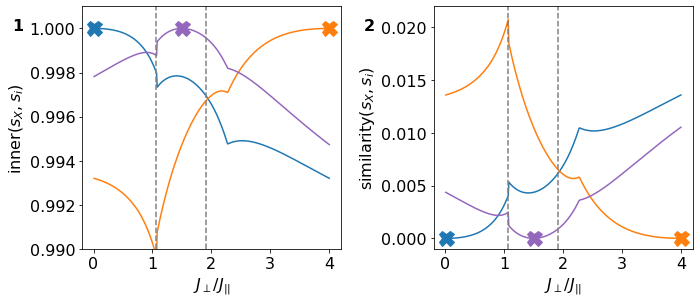

In [21]:
color = ["tab:blue", "tab:orange", "tab:purple"]

fig, axs = plt.subplots(ncols=2,figsize=(10,4.5))

ax = axs[0]
for i, pick in enumerate(picks):    
    overlaps0 = [np.inner(x_normed[pick], x_normed[j]) for j,_ in enumerate(x_normed)]
    ax.plot(xx, overlaps0,"-", color=color[i])
    ax.plot(xx[pick], overlaps0[pick],"X",markersize=15, color=color[i])
#ax.set_title("inner normed,")
ax.set_ylabel("inner$(s_X,s_i)$",fontsize=16)
ylim = (0.99,1.001)
ax.set_ylim(*ylim)
ax.plot([theory_1st[6,1]]*2,ylim,"--",color="grey")
ax.plot([theory_2nd[3,1]]*2,ylim,"--",color="grey")
ax.set_xlabel("$J_\perp/J_{{||}}$")

ax = axs[1]
for i, pick in enumerate(picks):    
    overlaps0 = [np.sum(np.abs(x_normed[pick] - x_normed[j])**2) for j,_ in enumerate(x_data)]
    ax.plot(xx, overlaps0,"-", color=color[i])
    ax.plot(xx[pick], overlaps0[pick],"X",markersize=15, color=color[i])
#ax.set_title("similarity")
ax.set_ylabel("similarity$(s_X,s_i)$")
ylim = (-0.001,0.022)
ax.set_ylim(*ylim)
ax.plot([theory_1st[6,1]]*2,ylim,"--",color="grey")
ax.plot([theory_2nd[3,1]]*2,ylim,"--",color="grey")
ax.set_xlabel("$J_\perp/J_{{||}}$")

plt.tight_layout()
axs[0].text(-0.27, 0.9,'1', fontweight = "bold", transform = axs[0].transAxes)
axs[1].text(-0.27, 0.9,'2', fontweight = "bold", transform = axs[1].transAxes)

plt.savefig("plots/Referee_test_dataD10s_cut03.png")
plt.savefig("plots/Referee_test_dataD10s_cut03.pdf")

# From random

In [22]:
data = np.loadtxt("data/dataD6weights030rand.txt")
data.shape

(1005, 27)

In [23]:
xx, yy = data[:,0], data[:,1]

In [24]:
sorter = np.argsort(xx)
xx, yy = xx[sorter], yy[sorter]

In [25]:
x_data = data[:,3:][sorter]

In [26]:
x_data.shape

(1005, 24)

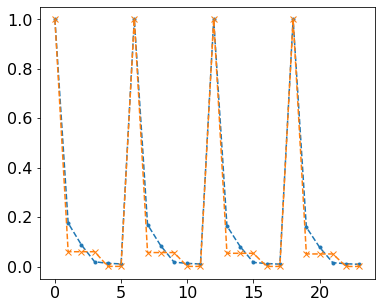

In [27]:
plt.plot(x_data[0],".--")
plt.plot(x_data[-1],"x--")

normalize data

In [28]:
x_normed = x_data.copy()

In [29]:
for i,x in enumerate(x_data):
    x_normed[i] = x/np.sqrt(np.inner(x,x))

alt. normalization

In [30]:
x_normed2 = x_data.copy()

In [31]:
for i,x in enumerate(x_data):
    x_normed2[i] = x/np.mean(x)

data from single training

In [32]:
temp = np.load("data_results/single_training_rand_data.npz",allow_pickle=True)

Text(0.5, 1.0, 'Anomaly Detection results')

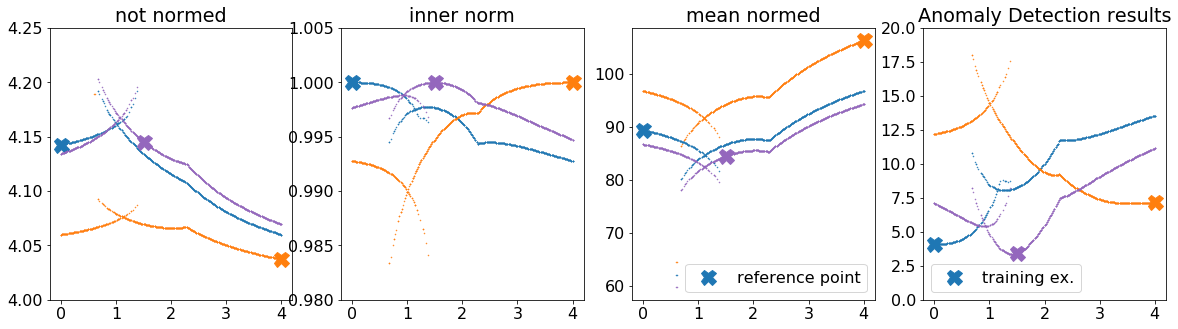

In [33]:
color = ["tab:blue", "tab:orange", "tab:purple"]
picks = [0, -1, 375]
trains = [0,1.5, 4]

fig, axs = plt.subplots(ncols=4,figsize=(20,5))

ax = axs[0]
for i, pick in enumerate(picks):    
    overlaps0 = [np.inner(x_data[pick], x_data[j]) for j,_ in enumerate(x_data)]
    ax.plot(xx, overlaps0,".", markersize=1, color=color[i])
    ax.plot(xx[pick], overlaps0[pick],"X",markersize=15, color=color[i])
ax.set_title("not normed")
ax.set_ylim(4,4.25)
    
ax = axs[1]
for i, pick in enumerate(picks):    
    overlaps0 = [np.inner(x_normed[pick], x_normed[j]) for j,_ in enumerate(x_normed)]
    ax.plot(xx, overlaps0,".", markersize=1, color=color[i])
    ax.plot(xx[pick], overlaps0[pick],"X",markersize=15, color=color[i])
ax.set_title("inner norm")
ax.set_ylim(0.98,1.005)
    
ax = axs[2]
for i, pick in enumerate(picks):    
    overlaps0 = [np.inner(x_normed2[pick], x_normed2[j]) for j,_ in enumerate(x_normed)]
    ax.plot(xx[pick], overlaps0[pick],"X",markersize=15, color=color[i])
    ax.plot(xx, overlaps0,".", markersize=1, color=color[i])
ax.set_title("mean normed")
ax.legend(["reference point"])

ax = axs[3]
train1s = temp["train1s"]
for i, pick in enumerate(picks):
    xx2, out = temp["xx"],temp["outs"][i]
    ax.plot(xx2[pick], out[pick],"X", markersize=15,color=color[i])
    ax.plot(xx2, out,".", markersize=1,color=color[i])
    
ax.legend(["training ex."])
ax.set_ylim(0,20)
ax.set_title("Anomaly Detection results")

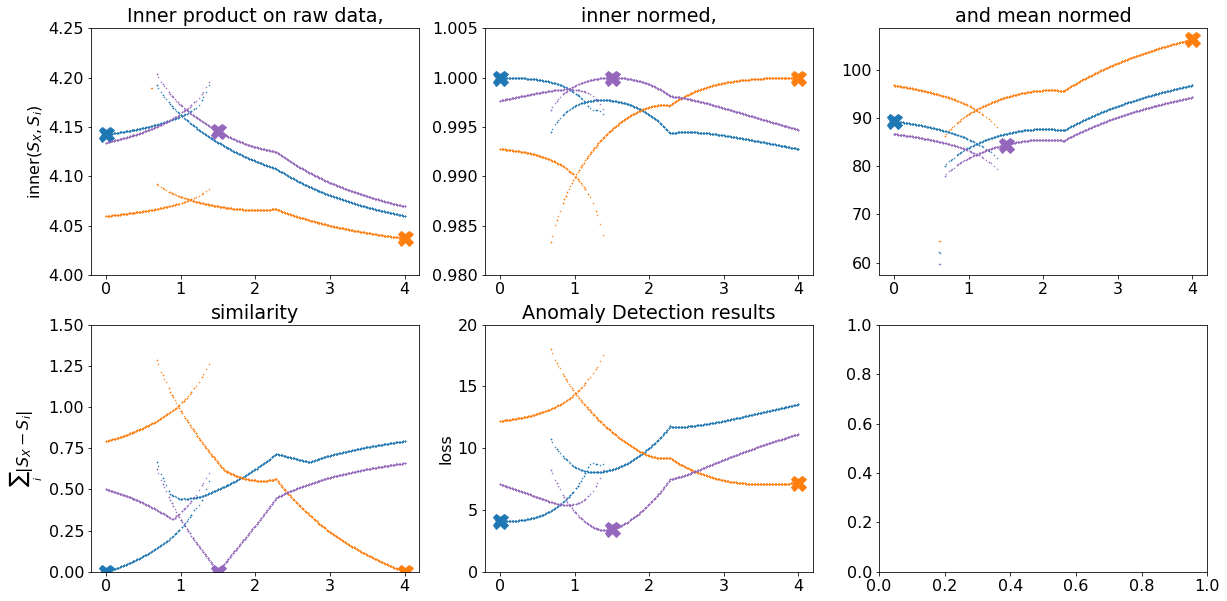

In [34]:
color = ["tab:blue", "tab:orange", "tab:purple"]
picks = [0, -1, 375]
trains = [0,1.5, 4]

fig, axs = plt.subplots(ncols=3, nrows=2,figsize=(20,10))

ax = axs[0,0]
for i, pick in enumerate(picks):    
    overlaps0 = [np.inner(x_data[pick], x_data[j]) for j,_ in enumerate(x_data)]
    ax.plot(xx, overlaps0,".", markersize=1, color=color[i])
    ax.plot(xx[pick], overlaps0[pick],"X",markersize=15, color=color[i])
ax.set_title("Inner product on raw data,")
ax.set_ylabel("inner$(S_X,S_i)$",fontsize=16)
ax.set_ylim(4,4.25)
    
ax = axs[0,1]
for i, pick in enumerate(picks):    
    overlaps0 = [np.inner(x_normed[pick], x_normed[j]) for j,_ in enumerate(x_normed)]
    ax.plot(xx, overlaps0,".", markersize=1, color=color[i])
    ax.plot(xx[pick], overlaps0[pick],"X",markersize=15, color=color[i])
ax.set_title("inner normed,")
ax.set_ylim(0.98,1.005)
    
ax = axs[0,2]
for i, pick in enumerate(picks):    
    overlaps0 = [np.inner(x_normed2[pick], x_normed2[j]) for j,_ in enumerate(x_normed)]
    ax.plot(xx, overlaps0,".", markersize=1, color=color[i])
    ax.plot(xx[pick], overlaps0[pick],"X",markersize=15, color=color[i])
ax.set_title("and mean normed")

ax = axs[1,0]
for i, pick in enumerate(picks):    
    overlaps0 = [np.sum(np.abs(x_data[pick] - x_data[j])) for j,_ in enumerate(x_data)]
    ax.plot(xx, overlaps0,".", markersize=1, color=color[i])
    ax.plot(xx[pick], overlaps0[pick],"X",markersize=15, color=color[i])
ax.set_title("similarity")
ax.set_ylabel("$\\sum_i |S_X - S_i|$")
ax.set_ylim(0,1.5)

ax = axs[1,1]
train1s = temp["train1s"]
for i, pick in enumerate(picks):   
    xx2, out = temp["xx"],temp["outs"][i]
    ax.plot(xx2, out,".", markersize=1,color=color[i])
    ax.plot(xx2[pick], out[pick],"X", markersize=15,color=color[i])
ax.set_title("Anomaly Detection results")
ax.set_ylabel("loss")
ax.set_ylim(0,20)

plt.savefig("plots/Referee_test_dataD6weights030rand.png")
plt.savefig("plots/Referee_test_dataD6weights030rand.pdf")

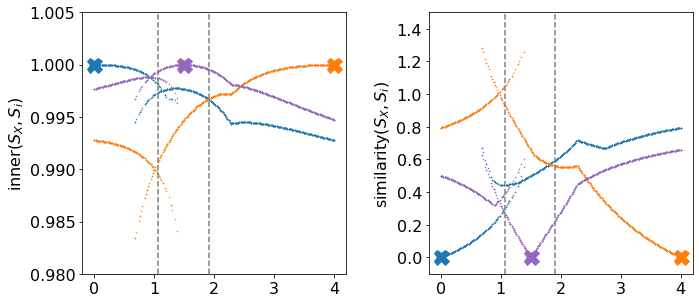

In [35]:
color = ["tab:blue", "tab:orange", "tab:purple"]
picks = [0, -1, 375]
trains = [0,1.5, 4]

fig, axs = plt.subplots(ncols=2,figsize=(10,4.5))

ax = axs[0]
for i, pick in enumerate(picks):    
    overlaps0 = [np.inner(x_normed[pick], x_normed[j]) for j,_ in enumerate(x_normed)]
    ax.plot(xx, overlaps0,".", markersize=1, color=color[i])
    ax.plot(xx[pick], overlaps0[pick],"X",markersize=15, color=color[i])
#ax.set_title("inner normed,")
ax.set_ylabel("inner$(S_X,S_i)$",fontsize=16)
ylim = (0.98,1.005)
ax.set_ylim(*ylim)
ax.plot([theory_1st[6,1]]*2,ylim,"--",color="grey")
ax.plot([theory_2nd[3,1]]*2,ylim,"--",color="grey")

ax = axs[1]
for i, pick in enumerate(picks):    
    overlaps0 = [np.sum(np.abs(x_data[pick] - x_data[j])) for j,_ in enumerate(x_data)]
    ax.plot(xx, overlaps0,".", markersize=1, color=color[i])
    ax.plot(xx[pick], overlaps0[pick],"X",markersize=15, color=color[i])
#ax.set_title("similarity")
ax.set_ylabel("similarity$(S_X,S_i)$")
ylim = (-0.1,1.5)
ax.set_ylim(*ylim)
ax.plot([theory_1st[6,1]]*2,ylim,"--",color="grey")
ax.plot([theory_2nd[3,1]]*2,ylim,"--",color="grey")

plt.tight_layout()

plt.savefig("plots/Referee_test_dataD6weights030rand.png")
plt.savefig("plots/Referee_test_dataD6weights030rand.pdf")